In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import xlrd

import os

# from pandas import read_csv
from pandas import DataFrame
# from pandas import concat

# from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

from sklearn import metrics
# from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# from keras.models import Sequential
# from keras.layers import Dense
# from keras.layers import Dropout
# from keras.layers import LSTM
# from keras.layers import Bidirectional

import tensorflow as tf

# from math import sqrt
# from numpy import concatenate

# from keras_tuner import RandomSearch
# from keras_tuner import GridSearch
# from pickle import dump, load
# import warnings
# warnings.simplefilter("ignore", UserWarning)

In [2]:
import pandas as pd
import numpy as np
import sys
import os
import random
from pathlib import Path

In [3]:
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D, Dropout, BatchNormalization,LeakyReLU
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, Callback, EarlyStopping, ReduceLROnPlateau, LearningRateScheduler
from keras.utils import to_categorical
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
import tensorflow

In [4]:
import imageio
import skimage
import skimage.io
import skimage.transform

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [6]:
import scipy
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [7]:
from google.colab import drive
drive.mount('/content/drive')
%cd drive/MyDrive/Capstone Project C23-PC648/Notebook

Mounted at /content/drive
/content/drive/MyDrive/Capstone Project C23-PC648/Notebook


In [ ]:
## VARIABLE CONST ##
IMAGE_PATH = 'bee_imgs'

# About this notebook

This notebook completely follow (with a few minor tweaks) codes from Kaggle that also process the same honeybee image. This was done to get insight on what other programmer has done to the same dataset. However, we will not be using this for our capstone project as our approach to the problem and processing will be different.

# Read and Explore

In [ ]:
bee_data = pd.read_csv('bee_data.csv')
bee_data.head()

,file,date,time,location,zip code,subspecies,health,pollen_carrying,caste
0,041_066.png,8/28/18,16:07,"Alvin, TX, USA",77511,-1,hive being robbed,False,worker
1,041_072.png,8/28/18,16:07,"Alvin, TX, USA",77511,-1,hive being robbed,False,worker
2,041_073.png,8/28/18,16:07,"Alvin, TX, USA",77511,-1,hive being robbed,False,worker
3,041_067.png,8/28/18,16:07,"Alvin, TX, USA",77511,-1,hive being robbed,False,worker
4,041_059.png,8/28/18,16:07,"Alvin, TX, USA",77511,-1,hive being robbed,False,worker


In [ ]:
bee_data.shape

(5172, 9)

In [ ]:
bee_data.columns

Index(['file', 'date', 'time', 'location', 'zip code', 'subspecies', 'health',
       'pollen_carrying', 'caste'],
      dtype='object')

In [ ]:
bee_data.isnull().sum()

file               0
date               0
time               0
location           0
zip code           0
subspecies         0
health             0
pollen_carrying    0
caste              0
dtype: int64

In [ ]:
bee_data.groupby(['health'])['health'].value_counts()

health                      health                    
Varroa, Small Hive Beetles  Varroa, Small Hive Beetles     472
ant problems                ant problems                   457
few varrao, hive beetles    few varrao, hive beetles       579
healthy                     healthy                       3384
hive being robbed           hive being robbed              251
missing queen               missing queen                   29
Name: health, dtype: int64

In [ ]:
image_files = list(os.listdir(IMAGE_PATH))
print("Number of image files: {}".format(len(image_files)))

Number of image files: 5172


In [ ]:
image_files[:10]

['040_326.png',
 '040_268.png',
 '043_058.png',
 '040_278.png',
 '042_033.png',
 '040_457.png',
 '040_107.png',
 '040_059.png',
 '038_070.png',
 '039_025.png']

In [ ]:
categories = (bee_data.groupby(['health'])['health'].nunique()).index

In [ ]:
categories

Index(['Varroa, Small Hive Beetles', 'ant problems',
       'few varrao, hive beetles', 'healthy', 'hive being robbed',
       'missing queen'],
      dtype='object', name='health')

In [ ]:
bee_data['health'].nunique()

6

In [ ]:
IMAGE_WIDTH = 100
IMAGE_HEIGHT = 100
IMAGE_CHANNELS = 3
RANDOM_STATE = 123
TEST_SIZE = 0.2
# VAL_SIZE = 0.2


In [ ]:
train_df, test_df = train_test_split(bee_data, test_size=TEST_SIZE, 
                                     stratify=bee_data['health'],
                                     random_state=RANDOM_STATE)

In [ ]:
train_df

,file,date,time,location,zip code,subspecies,health,pollen_carrying,caste
1378,005_599.png,7/7/18,12:56,"Saratoga, CA, USA",95070,Italian honey bee,healthy,False,worker
4185,038_202.png,8/18/18,12:30,"Athens, Georgia, USA",30607,1 Mixed local stock 2,"Varroa, Small Hive Beetles",False,worker
1922,040_457.png,8/21/18,15:56,"Athens, GA, USA",30607,Italian honey bee,"few varrao, hive beetles",False,worker
3865,032_931.png,8/21/18,9:00,"Des Moines, IA, USA",50315,Russian honey bee,healthy,False,worker
253,003_145.png,7/2/18,13:57,"Saratoga, CA, USA",95070,Italian honey bee,healthy,False,worker
...,...,...,...,...,...,...,...,...,...
1959,002_086.png,8/25/18,14:00,"Keene, NH, USA",3431,Russian honey bee,healthy,False,worker
3919,032_488.png,8/21/18,9:00,"Des Moines, IA, USA",50315,Russian honey bee,healthy,False,worker
508,022_353.png,8/10/18,13:54,"Saratoga, CA, USA",95070,Italian honey bee,healthy,False,worker
2370,031_069.png,8/21/18,15:56,"Athens, GA, USA",30607,Italian honey bee,"few varrao, hive beetles",False,worker


In [ ]:
test_df

,file,date,time,location,zip code,subspecies,health,pollen_carrying,caste
3437,015_1235.png,8/6/18,13:19,"Saratoga, CA, USA",95070,Italian honey bee,healthy,False,worker
1564,040_066.png,8/21/18,15:56,"Athens, GA, USA",30607,Italian honey bee,"few varrao, hive beetles",False,worker
3793,032_666.png,8/21/18,9:00,"Des Moines, IA, USA",50315,Russian honey bee,healthy,False,worker
2047,016_139.png,8/20/18,11:55,"San Jose, CA, USA",95124,-1,healthy,False,worker
3395,015_1222.png,8/6/18,13:19,"Saratoga, CA, USA",95070,Italian honey bee,healthy,False,worker
...,...,...,...,...,...,...,...,...,...
561,008_279.png,8/16/18,8:20,"New Orleans, LA, USA",70115,VSH Italian honey bee,healthy,False,worker
908,030_703.png,8/17/18,17:50,"Alvin, TX, USA",77511,Italian honey bee,ant problems,False,worker
1750,040_225.png,8/21/18,15:56,"Athens, GA, USA",30607,Italian honey bee,"few varrao, hive beetles",False,worker
3854,032_501.png,8/21/18,9:00,"Des Moines, IA, USA",50315,Russian honey bee,healthy,False,worker


# Split Train Test

In [ ]:
def read_image(file_name):
  image = skimage.io.imread('bee_imgs/' + file_name)
  image = skimage.transform.resize(image, (IMAGE_WIDTH, IMAGE_HEIGHT), mode='reflect')
  return image[:,:,:IMAGE_CHANNELS]

In [ ]:
def categories_encoder(dataset, var='health'):
    X = np.stack(dataset['file'].apply(read_image))
    y = pd.get_dummies(dataset[var], drop_first=False)
    return X, y

In [8]:
X_train = np.load('SAVE_NPY_1/X_train.npy')
y_train = pd.read_pickle('SAVE_NPY_1/y_train.pkl')
X_test  = np.load('SAVE_NPY_1/X_test.npy')
y_test  = pd.read_pickle('SAVE_NPY_1/y_test.pkl')

In [9]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(4137, 100, 100, 3) (4137, 6) (1035, 100, 100, 3) (1035, 6)


In [ ]:
# X_train = np.stack(train_df['file'].apply(read_image))
# y_train = pd.get_dummies(train_df['health'], drop_first=False)

In [ ]:
# y_train.to_pickle('y_train.pkl')
# y_test.to_pickle('y_test.pkl')

In [ ]:
# with open('X_train.npy', 'wb') as f:
#     np.save(f, X_train)
# with open('y_train.npy', 'wb') as f:
#     np.save(f, y_train)

In [ ]:
# X_test = np.stack(test_df['file'].apply(read_image))
# y_test = pd.get_dummies(test_df['health'], drop_first=False)

In [ ]:
# with open('X_test.npy', 'wb') as f:
#     np.save(f, X_test)
# with open('y_test.npy', 'wb') as f:
#     np.save(f, y_test)

# Build Model

In [10]:
CONV_2D_DIM_1 = 16
CONV_2D_DIM_2 = 16
CONV_2D_DIM_3 = 32
CONV_2D_DIM_4 = 64
MAX_POOL_DIM = 2
KERNEL_SIZE = 3
BATCH_SIZE = 32
NO_EPOCHS_1 = 5
NO_EPOCHS_2 = 10
NO_EPOCHS_3 = 50
PATIENCE = 5
VERBOSE = 1

In [11]:
def create_model():
  model = Sequential([
      Conv2D(16, kernel_size=3, input_shape=(100,100,3),
             activation='relu', padding='same'),
      MaxPool2D(2),

      Conv2D(16, kernel_size=3,
             activation='relu', padding='same'),
      MaxPool2D(2),

      Flatten(),
      Dense(6, activation='softmax')
  ])

  return model

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 16)        2320      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 25, 25, 16)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 10000)             0         
                                                                 
 dense (Dense)               (None, 6)                 6

# Image Generator

In [28]:
generator = ImageDataGenerator(
            featurewise_center=False, 
            samplewise_center=False, 
            featurewise_std_normalization=False, 
            samplewise_std_normalization=False, 
            zca_whitening=False, 
            rotation_range=180, 
            zoom_range = 0.1,
            width_shift_range=0.2, 
            height_shift_range=0.2, 
            horizontal_flip=True, 
            vertical_flip=True)

In [29]:
generator.fit(X_train)

In [30]:
generator

# Train Model

In [31]:
tensorflow.keras.backend.clear_session()

model = create_model()

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [32]:
train_model  = model.fit(
    generator.flow(X_train, y_train, batch_size=BATCH_SIZE),
    epochs=20,
    validation_data=[X_test, y_test],
    steps_per_epoch=len(X_train)/BATCH_SIZE
    )

Epoch 1/20
129/129 [==============================] - 12s 77ms/step - loss: 0.9074 - accuracy: 0.6826 - val_loss: 0.6045 - val_accuracy: 0.7575
Epoch 2/20
129/129 [==============================] - 11s 84ms/step - loss: 0.5457 - accuracy: 0.7943 - val_loss: 0.4896 - val_accuracy: 0.7961
Epoch 3/20
129/129 [==============================] - 11s 84ms/step - loss: 0.4811 - accuracy: 0.8071 - val_loss: 0.4097 - val_accuracy: 0.8386
Epoch 4/20
129/129 [==============================] - 10s 75ms/step - loss: 0.4262 - accuracy: 0.8293 - val_loss: 0.3833 - val_accuracy: 0.8280
Epoch 5/20
129/129 [==============================] - 10s 76ms/step - loss: 0.3679 - accuracy: 0.8487 - val_loss: 0.3309 - val_accuracy: 0.8609
Epoch 6/20
129/129 [==============================] - 13s 99ms/step - loss: 0.3324 - accuracy: 0.8675 - val_loss: 0.3095 - val_accuracy: 0.8599
Epoch 7/20
129/129 [==============================] - 11s 83ms/step - loss: 0.2978 - accuracy: 0.8738 - val_loss: 0.3097 - val_accuracy:

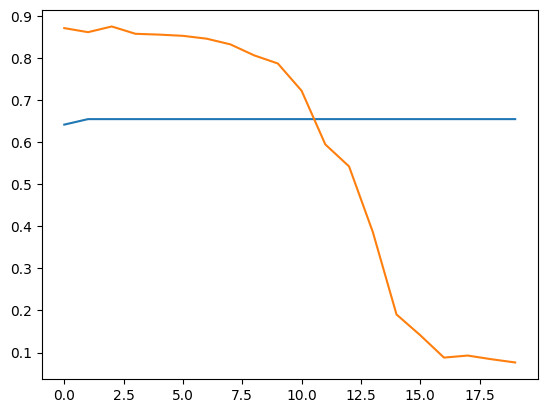

In [26]:
plt.plot(train_model.history['accuracy'])
plt.plot(train_model.history['val_accuracy'])

<function matplotlib.pyplot.show(close=None, block=None)>

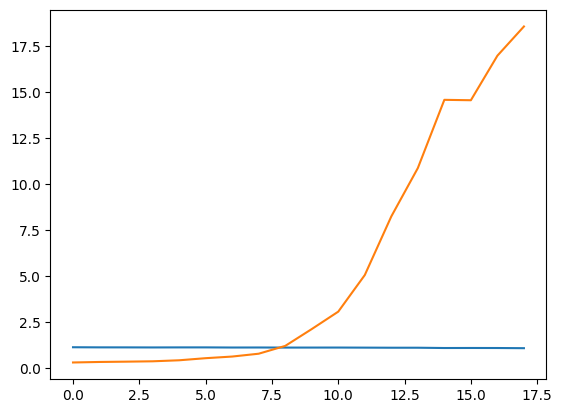

In [27]:
plt.plot(train_model.history['loss'][2:])
plt.plot(train_model.history['val_loss'][2:])

plt.show

In [ ]:
predicted = model.predict(X_test)
test_predicted = np.argmax(predicted, axis=1)
test_truth = np.argmax(y_test.values, axis=1)
print(metrics.classification_report(test_truth, test_predicted, target_names=y_test.columns)) 

33/33 [==============================] - 0s 4ms/step
                            precision    recall  f1-score   support

Varroa, Small Hive Beetles       0.88      0.16      0.27        95
              ant problems       0.99      0.95      0.97        91
  few varrao, hive beetles       0.53      0.90      0.66       116
                   healthy       0.97      0.98      0.97       677
         hive being robbed       0.96      0.88      0.92        50
             missing queen       0.86      1.00      0.92         6

                  accuracy                           0.89      1035
                 macro avg       0.86      0.81      0.79      1035
              weighted avg       0.91      0.89      0.87      1035

